# U.S. Medical Insurance Costs

 ## **Key facts about smoking**

### According to WHO

   * Tobacco kills up to half of its users.
   * Tobacco kills more than 8 million people each year. More than 7 million of those deaths are the result of direct tobacco use while around 1.2 million are the result of non-smokers being exposed to second-hand smoke.
   * Over 80% of the world's 1.3 billion tobacco users live in low- and middle-income countries.
   * Leading cause of death, illness and impoverishment 

**All forms of tobacco are harmful, and there is no safe level of exposure to tobacco.** Cigarette smoking is the most common form of tobacco use worldwide. Other tobacco products include waterpipe tobacco, various smokeless tobacco products, cigars, cigarillos, roll-your-own tobacco, pipe tobacco, bidis and kreteks.

Smokeless tobacco use is highly addictive and damaging to health. Smokeless tobacco contains many cancer-causing toxins and its use increases the risk of cancers of the head, neck, throat, oesophagus and oral cavity (including cancer of the mouth, tongue, lip and gums) as well as various dental diseases.

The economic costs of tobacco use are substantial and include significant health care costs for treating the diseases caused by tobacco use as well as the lost human capital that results from tobacco-attributable morbidity and mortality.

In some countries children from poor households are employed in tobacco farming to boost family income. Tobacco growing farmers are also exposed to a number of health risks, including the "green tobacco sickness". 


In my project, I want to consider the dependence of the smoking on other factors, such as age, gender, the presence of children, region. Since a smoking can cause many diseases, insurance companies are interested in lowering it and making healthy their clients, reducing the risks of payments for the treatment of associated diseases. After analyzing the data, we will try to answer the question of how an insurance company can improve the overweight situation. First of all, let's analyze the data in our datafile, check it for balance.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_insurance = pd.read_csv("insurance.csv") #this pd.read_csv method lets create df directly from .csv file
df_insurance.index = range(1,1339) #sets index in proper range, to avoid calculation problems with row[0]

In [3]:
print(df_insurance)

      age     sex     bmi  children smoker     region      charges
1      19  female  27.900         0    yes  southwest  16884.92400
2      18    male  33.770         1     no  southeast   1725.55230
3      28    male  33.000         3     no  southeast   4449.46200
4      33    male  22.705         0     no  northwest  21984.47061
5      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1334   50    male  30.970         3     no  northwest  10600.54830
1335   18  female  31.920         0     no  northeast   2205.98080
1336   18  female  36.850         0     no  southeast   1629.83350
1337   21  female  25.800         0     no  southwest   2007.94500
1338   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Above there is dataset that will be analyzed in my project.

## **Determining the max, min and the average value for each column:**

In [4]:
def max_min_mean(column):
    max = df_insurance[column].max()
    min = df_insurance[column].min()
    mean = round(df_insurance[column].mean(),2)
    
    return "{column}: max value is {max}, min value is {min}, average value is {mean}".format(max=max, min=min, mean=mean, column=column)

[max_min_mean('age'), max_min_mean('bmi'), max_min_mean('charges'), max_min_mean('children')] #run max_min_mean method with every column, we need

['age: max value is 64, min value is 18, average value is 39.21',
 'bmi: max value is 53.13, min value is 15.96, average value is 30.66',
 'charges: max value is 63770.42801, min value is 1121.8739, average value is 13270.42',
 'children: max value is 5, min value is 0, average value is 1.09']

The age data is broad enough. I analyzed balance of dataset by selecting categories 18-25 years old, 26-35 years old, 36-45 years old, 46-55 years old, 56-65 years old.

## **Verifying representation of each age group.**

In [5]:
def age_representation_calc():
    age_representation = [0,0,0,0,0]
    for age in df_insurance['age']:
        if age <= 25:
            age_representation[0] += 1
        elif age <=35:
            age_representation[1] += 1
        elif age <= 45:
            age_representation[2] += 1
        elif age <= 55:
            age_representation[3] += 1
        else:
            age_representation[4] += 1
    return age_representation

In [6]:
age_representation = age_representation_calc()

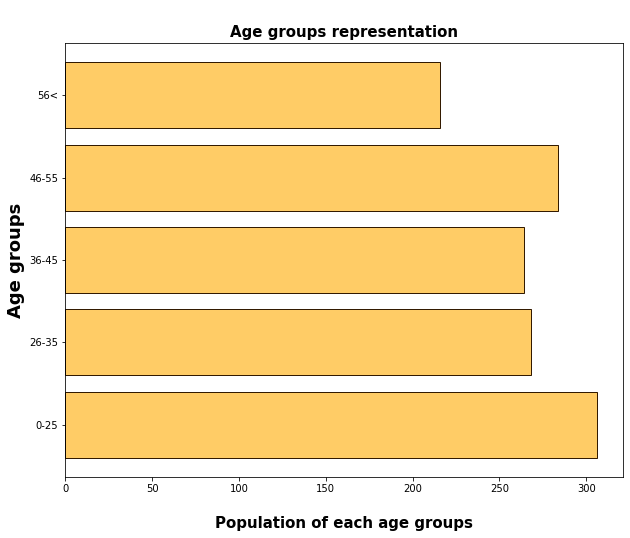

In [7]:
fig, ax = plt.subplots(figsize = (10,8))

x = np.array(["0-25", "26-35", "36-45", "46-55", "56<"])
y = np.array(age_representation)

ax.set_title('\nAge groups representation', fontweight ='bold', fontsize = 15)
ax.set_xlabel('\nPopulation of each age groups', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Age groups', fontweight ='bold', fontsize = 18)
 
plt.barh(x, y, color='#ffcc66', edgecolor='#331a00')
plt.show()

The plot shows, that data is distributed evenly. Every of five age groups is represented equally.

## **Verifying representation of each sex.**

In [8]:
def sex_representation_calc():
    male = round((df_insurance['sex'].value_counts().male/ 1338 )*100,2)
    female = round((df_insurance['sex'].value_counts().female/ 1338 )*100,2)
    return "{column}: in this dataset there is {male}% of males, and {female}% of females.".format(column='sex', male=male, female=female)

In [9]:
sex_representation_calc()

'sex: in this dataset there is 50.52% of males, and 49.48% of females.'

We can see that the respondents have the same number of men and women. It is important that both sexes are represented equally. This has a significant impact on the reliability of the results.

## **Verifying representation of bmi sections for respondents.**

In [10]:
def bmi_representation_calc():
    bmi_representation = [0,0,0,0,0,0]
    for bmi in df_insurance['bmi']:
        if bmi <=18:
            bmi_representation[0] += 1
        elif bmi <= 25:
            bmi_representation[1] += 1
        elif bmi <= 30:
            bmi_representation[2] += 1
        elif bmi <= 34:
            bmi_representation[3] += 1
        elif bmi <= 40:
            bmi_representation[4] += 1
        else:
            bmi_representation[5] += 1
    return bmi_representation

In [11]:
bmi_representation = bmi_representation_calc()

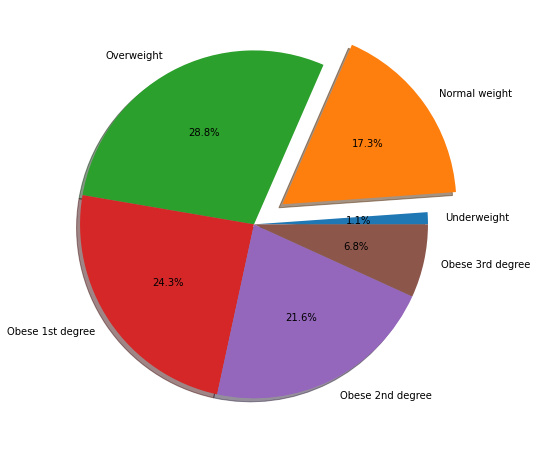

In [12]:
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese 1st degree', 'Obese 2nd degree', 'Obese 3rd degree']
sizes = bmi_representation_calc()
explode = (0, 0.2, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle = 0, shadow=True )


plt.show()

As we can see on the pie diagram, only 17,3% reponsents has normal weight, 1,1% is underweight, but 81,6% is overweight or obese. Weight factor has significant impact on overall health condition.

## **Verifying representation of each region.**

In [13]:
def region_representation_calc():
    southeast = round((df_insurance['region'].value_counts().southeast / 1338) * 100, 2)
    southwest = round((df_insurance['region'].value_counts().southwest / 1338) * 100, 2)
    northeast = round((df_insurance['region'].value_counts().northeast / 1338) * 100, 2)
    northwest = round((df_insurance['region'].value_counts().northwest / 1338) * 100, 2)
    return [southeast, southwest, northeast, northwest]

In [58]:
region_representation = region_representation_calc()

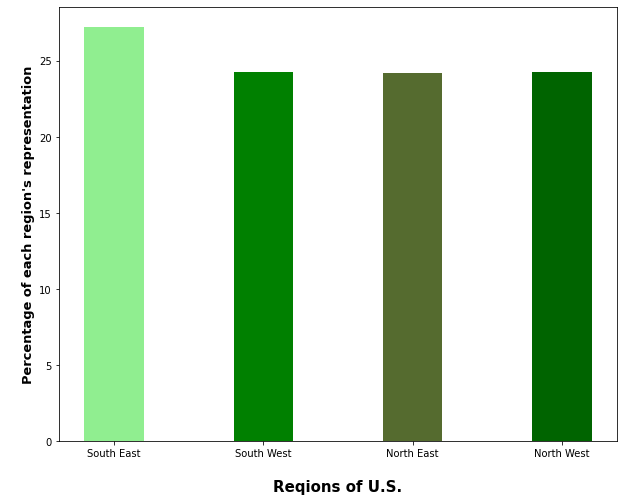

In [15]:
fig2, ax2 = plt.subplots(figsize = (10,8))
x = ['South East', 'South West', 'North East', 'North West']
y = region_representation_calc()

ax2.set_xlabel('\nReqions of U.S.', fontweight ='bold', fontsize = 15)
ax2.set_ylabel('\nPercentage of each region\'s representation', fontweight ='bold', fontsize = 13)
ax2.bar(x, y, width=0.4, color=['lightgreen', 'green', 'darkolivegreen', 'darkgreen'], )

plt.show()

It is important that every area of U.S. is represented equally. Thanks to that we can analyze make conclusions without missing any of region.

## **Smokers share** 

In [16]:
def smokers_share_calc():
    smokers_quantity = df_insurance['smoker'].value_counts().yes
    smokers_share = round((df_insurance['smoker'].value_counts().yes / 1338) * 100, 2)
    return "{smokers_quantity} ({smokers_share}%) of respondents smoke.".format(smokers_share=smokers_share, smokers_quantity=smokers_quantity)

In [17]:
smokers_share = smokers_share_calc()

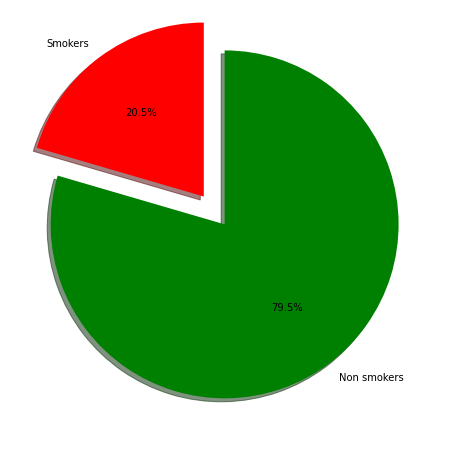

In [18]:
labels = ['Smokers', 'Non smokers']
smokers = [20.48, (100-20.48)]
explode = (0.2,0)
figsize = (10,8)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(smokers, explode=explode, labels=labels, autopct='%1.1f%%', startangle = 90, shadow=True, colors = ["red", "green"])


plt.show()

More than one fifth respondents smoke. As smoking leads to the serious medical problems, it is important to raise social awarness and promote smoking-free lifestyle.

## **Smokers in each age groups**

In [19]:
smokers_only = df_insurance[df_insurance["smoker"] == 'yes'] #zwraca df z samymi palaczami
print(smokers_only)

      age     sex     bmi  children smoker     region      charges
1      19  female  27.900         0    yes  southwest  16884.92400
12     62  female  26.290         0    yes  southeast  27808.72510
15     27    male  42.130         0    yes  southeast  39611.75770
20     30    male  35.300         0    yes  southwest  36837.46700
24     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1314   19  female  34.700         2    yes  southwest  36397.57600
1315   30  female  23.655         3    yes  northwest  18765.87545
1322   62    male  26.695         0    yes  northeast  28101.33305
1324   42  female  40.370         2    yes  southeast  43896.37630
1338   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]


In [20]:
non_smokers_only = df_insurance[df_insurance["smoker"] == 'no']

In [21]:
def smokers_age_representation_calc(smokers_only):
    smokers_age_representation = [0,0,0,0,0]
    for age in smokers_only['age']:
        if age <= 25:
            smokers_age_representation[0] += 1
        elif age <=35:
            smokers_age_representation[1] += 1
        elif age <= 45:
            smokers_age_representation[2] += 1
        elif age <= 55:
            smokers_age_representation[3] += 1
        else:
            smokers_age_representation[4] += 1
    return smokers_age_representation

def non_smokers_age_representation_calc(non_smokers_only):
    non_smokers_age_representation = [0,0,0,0,0]
    for age in non_smokers_only['age']:
        if age <= 25:
            non_smokers_age_representation[0] += 1
        elif age <=35:
            non_smokers_age_representation[1] += 1
        elif age <= 45:
            non_smokers_age_representation[2] += 1
        elif age <= 55:
            non_smokers_age_representation[3] += 1
        else:
            non_smokers_age_representation[4] += 1
    return non_smokers_age_representation

In [22]:
smokers_age_representation_calc(smokers_only)

[65, 56, 61, 52, 40]

In [23]:
non_smokers_age_representation_calc(non_smokers_only)

[241, 212, 203, 232, 176]

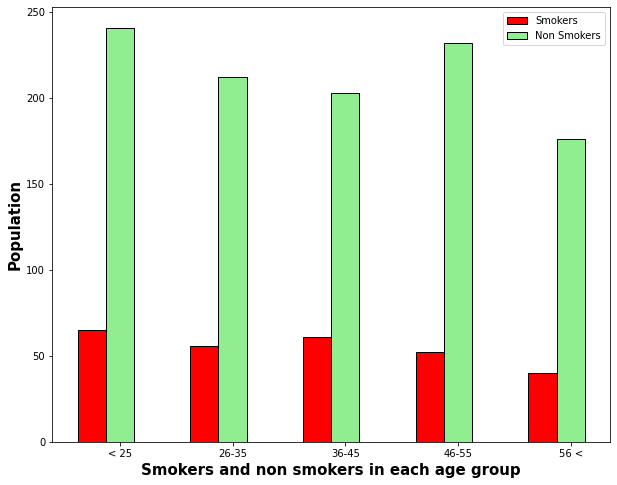

In [24]:
barWidth = 0.25
fig3 = plt.subplots(figsize =(10, 8))

S = smokers_age_representation_calc(smokers_only)
NS = non_smokers_age_representation_calc(non_smokers_only)

br_S = np.arange(len(S))
br_NS = [x + barWidth for x in br_S]

plt.bar(br_S, S, color='red', width=barWidth, label='Smokers', edgecolor='black')
plt.bar(br_NS, NS, color='lightgreen', width=barWidth, label='Non Smokers', edgecolor='black')

plt.xlabel('Smokers and non smokers in each age group', fontweight ='bold', fontsize = 15)
plt.ylabel('Population', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(S))], ['< 25', '26-35', '36-45', '46-55', '56 <'])

plt.legend()
plt.show()

As we can see in the chart above, there is equall amount of smokers in each age groups. Which shows us that age factor does not have impact on this addiction.

## Smokers in regions

In [25]:
smokers_only = df_insurance[df_insurance["smoker"] == 'yes']
print(smokers_only)

      age     sex     bmi  children smoker     region      charges
1      19  female  27.900         0    yes  southwest  16884.92400
12     62  female  26.290         0    yes  southeast  27808.72510
15     27    male  42.130         0    yes  southeast  39611.75770
20     30    male  35.300         0    yes  southwest  36837.46700
24     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1314   19  female  34.700         2    yes  southwest  36397.57600
1315   30  female  23.655         3    yes  northwest  18765.87545
1322   62    male  26.695         0    yes  northeast  28101.33305
1324   42  female  40.370         2    yes  southeast  43896.37630
1338   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]


In [26]:
def region_population_calc():
    region_population = [0, 0, 0, 0]
    for region in df_insurance["region"]:
        if region == "southwest":
            region_population[0] += 1
        elif region == "southeast":
            region_population[1] += 1
        elif region == "northwest":
            region_population[2] += 1
        else:
            region_population[3] += 1
    return region_population

In [27]:
region_population = region_population_calc()

In [28]:
print(region_population)

[325, 364, 325, 324]


In [29]:
print(str(region_population[0]) + " respondents live in South West of U.S., " + str(region_population[1]) + " respondents live in South East of U.S., " + str(region_population[2]) + " respondents live in North West of U.S., " + str(region_population[3]) + " respondents live in North East of U.S.")

325 respondents live in South West of U.S., 364 respondents live in South East of U.S., 325 respondents live in North West of U.S., 324 respondents live in North East of U.S.


In [30]:
def smokers_per_region_calc():
    smokers_per_region = [0, 0, 0, 0]
    for region in smokers_only["region"]:
        if region == "southwest":
            smokers_per_region[0] += 1
        elif region == "southeast":
            smokers_per_region[1] += 1
        elif region == "northwest":
            smokers_per_region[2] += 1
        else:
            smokers_per_region[3] += 1
    return smokers_per_region

In [31]:
smokers_per_region = smokers_per_region_calc()

In [32]:
def smokers_per_region_percentage_calc():
    south_west_smokers_percentage = round((smokers_per_region[0] / region_population[0]), 2)
    south_east_smokers_percentage = round((smokers_per_region[1] / region_population[1]), 2)
    north_west_smokers_percentage = round((smokers_per_region[2] / region_population[2]), 2)
    north_east_smokers_percentage = round((smokers_per_region[3] / region_population[3]), 2)
    
    return south_west_smokers_percentage, south_east_smokers_percentage, north_west_smokers_percentage, north_east_smokers_percentage
    

In [33]:
smokers_per_region_percentage = list(smokers_per_region_percentage_calc())

In [34]:
print(smokers_per_region_percentage)

[0.18, 0.25, 0.18, 0.21]


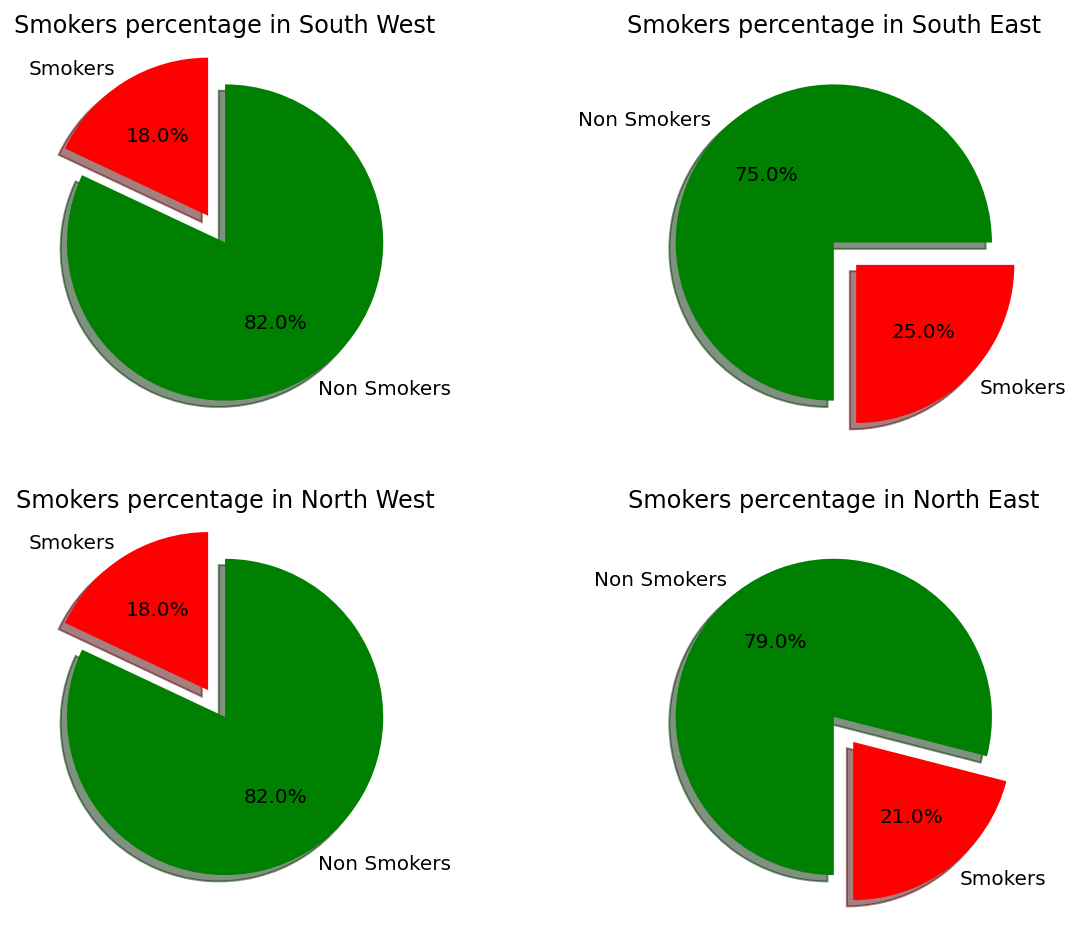

In [35]:
south_west_smokers_percentage = [18, (100-18)]
south_east_smokers_percentage = [25, (100-25)]
north_west_smokers_percentage = [18, (100-18)]
north_east_smokers_percentage = [21, (100-21)]

labels = ['Smokers', 'Non Smokers']

fig = plt.figure(figsize=(10,8), dpi = 144)
ax1 = fig.add_subplot(221)
ax1.pie(south_west_smokers_percentage, labels = labels, explode = (0.2, 0), shadow = True, colors = ["red", "green"], startangle = 90, autopct='%1.1f%%')
ax1.set_title("Smokers percentage in South West")

ax2 = fig.add_subplot(222)
ax2.pie(south_east_smokers_percentage, labels = labels, explode = (0.2, 0), shadow = True, colors = ["red", "green"], startangle= -90, autopct='%1.1f%%')
ax2.set_title("Smokers percentage in South East")

ax3 = fig.add_subplot(223)
ax3.pie(north_west_smokers_percentage, labels = labels, explode = (0.2, 0), shadow = True, colors = ["red", "green"], startangle = 90, autopct='%1.1f%%')
ax3.set_title("Smokers percentage in North West")

ax4 = fig.add_subplot(224)
ax4.pie(north_east_smokers_percentage, labels = labels, explode = (0.2, 0), shadow = True, colors = ["red", "green"], startangle = -90, autopct='%1.1f%%')
ax4.set_title("Smokers percentage in North East")


plt.show()

Pie charts above shows us that the South East area has the biggest percentage of smokers - 25%. In North West and in the Sount West smokers are only 18% of respondents, it is 2,5pp below average.

## Smokers in each sex group

In [36]:
females_only = df_insurance[df_insurance['sex'] == "female"]

In [37]:
males_only = df_insurance[df_insurance['sex'] == 'male']

In [38]:
non_smoker_females_only = females_only['smoker'].value_counts().no

In [39]:
non_smoker_males_only = males_only['smoker'].value_counts().no

In [40]:
smoker_females_only = females_only['smoker'].value_counts().yes

In [41]:
smoker_males_only = males_only['smoker'].value_counts().yes

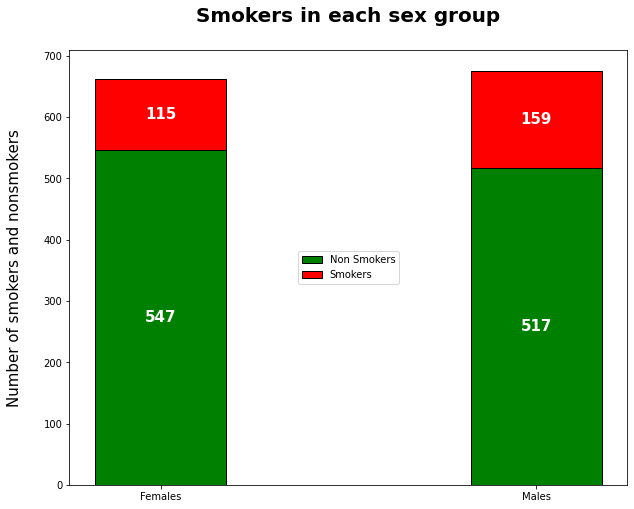

In [42]:
labels = ['Females', 'Males']
smokers = [smoker_females_only, smoker_males_only]
non_smokers = [non_smoker_females_only, non_smoker_males_only]
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(labels, non_smokers, width, label = "Non Smokers", color = "green", edgecolor='black')
ax.bar(labels, smokers, width, label = "Smokers", color = "red", edgecolor='black', bottom=non_smokers)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=15, fontweight = 'bold', color='white')

ax.set_ylabel("Number of smokers and nonsmokers\n", fontsize=15)
ax.set_title("Smokers in each sex group\n", fontsize=20, fontweight = "bold")
ax.legend(loc = 'center')


plt.show()



We can conclude that smoking does depend of sex. Among men there is 23,50% smokers, when only 17,37% of women smoke.

## Smoking and number of children

In [43]:
df_insurance_by_children = df_insurance.groupby(['children'])

In [44]:
def children_counter_calc():
    children_counter = [0, 0, 0, 0, 0, 0]
    for children in df_insurance['children']:
        if children == 0:
            children_counter[0] += 1
        elif children == 1:
            children_counter[1] += 1
        elif children == 2:
            children_counter[2] += 1
        elif children == 3:
            children_counter[3] += 1
        elif children == 4:
            children_counter[4] += 1
        else:
            children_counter[5] += 1
    return children_counter
                

In [45]:
children_counter = children_counter_calc()

In [46]:
def percentage_of_smokers_and_children_calc():
    smokers_and_children = [0, 0, 0, 0, 0, 0]
    children_0 = df_insurance[df_insurance['children'] == 0]
    smokers_and_children[0] = round((children_0['smoker'].value_counts().yes/children_counter[0]) * 100, 2)
    
    children_1 = df_insurance[df_insurance['children'] == 1]
    smokers_and_children[1] = round((children_1['smoker'].value_counts().yes/children_counter[1]) * 100, 2)
    
    children_2 = df_insurance[df_insurance['children'] == 2]
    smokers_and_children[2] = round((children_2['smoker'].value_counts().yes/children_counter[2]) * 100, 2)
    
    children_3 = df_insurance[df_insurance['children'] == 3]
    smokers_and_children[3] = round((children_3['smoker'].value_counts().yes/children_counter[3]) * 100, 2)
    
    children_4 = df_insurance[df_insurance['children'] == 4]
    smokers_and_children[4] = round((children_4['smoker'].value_counts().yes/children_counter[4]) * 100, 2)
    
    children_5 = df_insurance[df_insurance['children'] == 5]
    smokers_and_children[5] = round((children_5['smoker'].value_counts().yes/children_counter[5]) * 100, 2)
    
    return smokers_and_children

In [47]:
print(percentage_of_smokers_and_children_calc())

[20.03, 18.83, 22.92, 24.84, 12.0, 5.56]


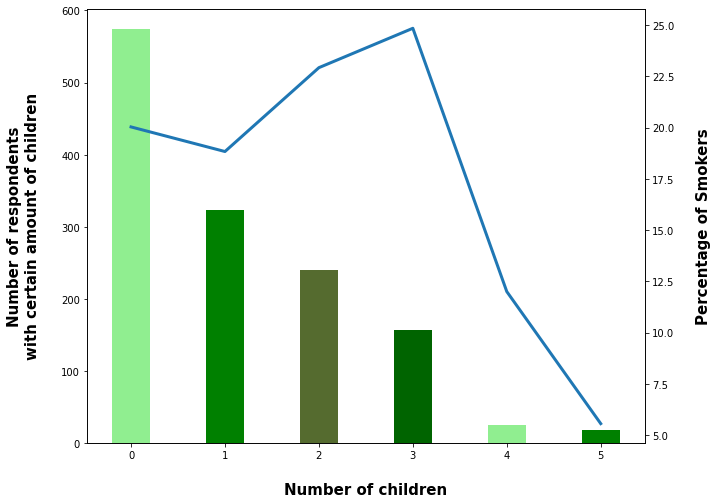

In [48]:
fig, ax1 = plt.subplots(figsize = (10,8))
x = ['0', '1', '2', '3', '4', '5']
y = children_counter_calc()

ax1.set_xlabel('\nNumber of children', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Number of respondents\nwith certain amount of children\n', fontweight ='bold', fontsize = 15)
ax1.bar(x, y, width=0.4, color=['lightgreen', 'green', 'darkolivegreen', 'darkgreen'], )

ax2 = ax1.twinx()

z = percentage_of_smokers_and_children_calc()
ax2.set_ylabel('\nPercentage of Smokers', fontweight = 'bold', fontsize = 15)
ax2.plot(x, z, linewidth=3.0)

plt.show()

## Smoker in each BMI group

In [49]:
def smokers_in_bmi_groups_calc():
    smokers_in_bmi_groups = [0, 0, 0, 0, 0, 0]
    smokers_in_uderweight = df_insurance[df_insurance['bmi'] <= 18]
    smokers_in_bmi_groups[0] = round((smokers_in_uderweight['smoker'].value_counts().yes /bmi_representation[0])*100, 2)
    
    smokers_in_normal_weight = df_insurance[df_insurance['bmi'] <= 25]
    smokers_in_bmi_groups[1] = round((smokers_in_normal_weight['smoker'].value_counts().yes / bmi_representation[1])*100, 2)
    
    smokers_in_overweight = df_insurance[df_insurance['bmi'] <= 30]
    smokers_in_bmi_groups[2] = round((smokers_in_overweight['smoker'].value_counts().yes / bmi_representation[2])*100, 2)
    
    smokers_in_obes_1st = df_insurance[df_insurance['bmi'] <= 35]
    smokers_in_bmi_groups[3] = round((smokers_in_obes_1st['smoker'].value_counts().yes / bmi_representation[3])*100, 2)
    
    smokers_in_obes_2nd = df_insurance[df_insurance['bmi'] <= 40]
    smokers_in_bmi_groups[4] = round((smokers_in_obes_2nd['smoker'].value_counts().yes / bmi_representation[4])*100, 2)
    
    smokers_in_obes_3rd = df_insurance[df_insurance['bmi'] > 40]
    smokers_in_bmi_groups[5] = round((smokers_in_obes_3rd['smoker'].value_counts().yes / bmi_representation[5])*100, 2)
    
    return smokers_in_bmi_groups

In [50]:
smokers_in_bmi_groups = smokers_in_bmi_groups_calc()

In [51]:
def non_smokers_in_bmi_groups_calc():
    non_smokers_in_bmi_groups = [0, 0, 0, 0, 0, 0]
    non_smokers_in_uderweight = df_insurance[df_insurance['bmi'] <= 18]
    non_smokers_in_bmi_groups[0] = round((non_smokers_in_uderweight['smoker'].value_counts().no /bmi_representation[0])*100, 2)
    
    non_smokers_in_normal_weight = df_insurance[df_insurance['bmi'] <= 25]
    non_smokers_in_bmi_groups[1] = round((non_smokers_in_normal_weight['smoker'].value_counts().no / bmi_representation[1])*100, 2)
    
    non_smokers_in_overweight = df_insurance[df_insurance['bmi'] <= 30]
    non_smokers_in_bmi_groups[2] = round((non_smokers_in_overweight['smoker'].value_counts().no / bmi_representation[2])*100, 2)
    
    non_smokers_in_obes_1st = df_insurance[df_insurance['bmi'] <= 35]
    non_smokers_in_bmi_groups[3] = round((non_smokers_in_obes_1st['smoker'].value_counts().no / bmi_representation[3])*100, 2)
    
    non_smokers_in_obes_2nd = df_insurance[df_insurance['bmi'] <= 40]
    non_smokers_in_bmi_groups[4] = round((non_smokers_in_obes_2nd['smoker'].value_counts().no / bmi_representation[4])*100, 2)
    
    non_smokers_in_obes_3rd = df_insurance[df_insurance['bmi'] > 40]
    non_smokers_in_bmi_groups[5] = round((non_smokers_in_obes_3rd['smoker'].value_counts().no / bmi_representation[5])*100, 2)
    
    return non_smokers_in_bmi_groups

In [52]:
non_smokers_in_bmi_groups = non_smokers_in_bmi_groups_calc()

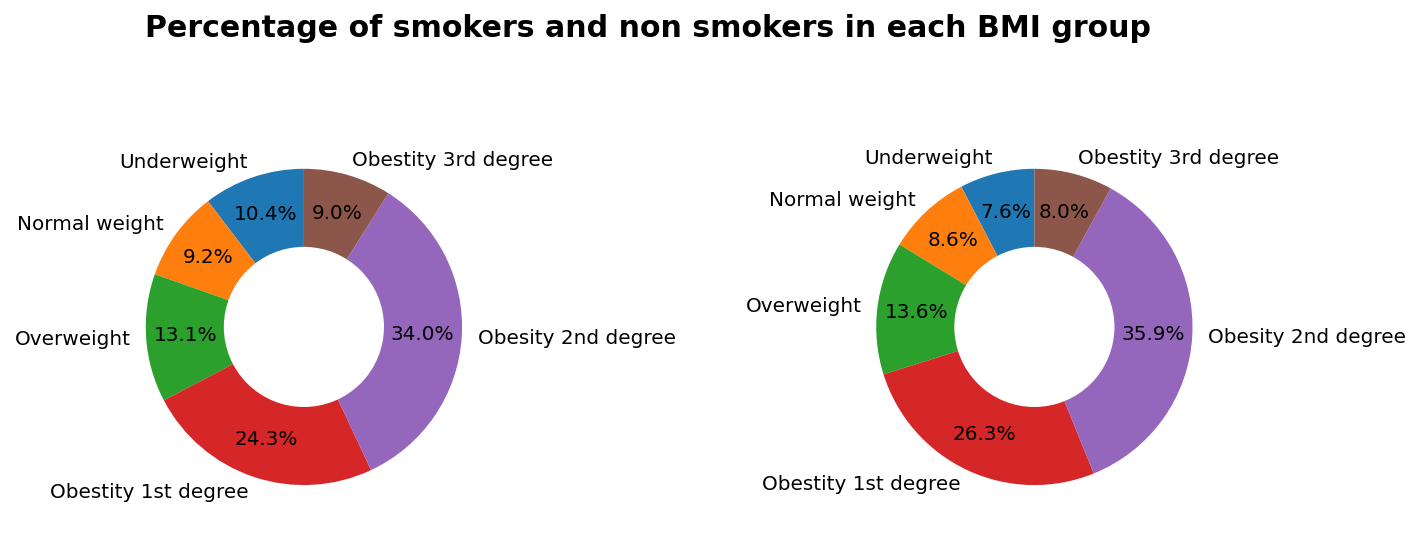

In [53]:
fig = plt.figure(figsize=(12,8), dpi = 144)
fig.suptitle('Percentage of smokers and non smokers in each BMI group', fontsize=15, fontweight='bold')

labels = ['Underweight', 'Normal weight', 'Overweight', 'Obestity 1st degree', 'Obesity 2nd degree', 'Obestity 3rd degree']
smokers_values = smokers_in_bmi_groups_calc()
non_smokers_values = non_smokers_in_bmi_groups_calc()
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']

ax1 = fig.add_subplot(221)
ax1 = plt.pie(smokers_values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, startangle=90)
my_circle = plt.Circle((0,0), 0.5, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)

ax2 = fig.add_subplot(222)
ax2 = plt.pie(non_smokers_values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, startangle=90)
my_circle_2 = plt.Circle((0,0), 0.5, color = 'white')
p.gca().add_artist(my_circle_2)


plt.show()

In [54]:
sorted_by_charges = df_insurance.sort_values(by=["charges"], ascending=True)

In [55]:
charges_values = list(round(sorted_by_charges['charges']))

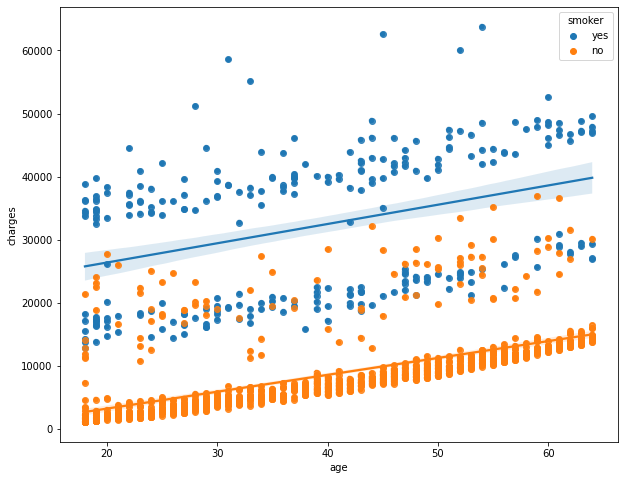

In [56]:
fig,ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x = df_insurance.age, y = df_insurance.charges, hue = df_insurance.smoker)
sns.regplot(x = df_insurance[df_insurance.smoker=='yes'].age,y = df_insurance[df_insurance.smoker=='yes'].charges)
sns.regplot(x = df_insurance[df_insurance.smoker=='no'].age,y = df_insurance[df_insurance.smoker=='no'].charges)
# A1 = np.vstack([df_insurance[df_insurance.smoker=='yes'].age,np.ones(len(df_insurance[df_insurance.smoker=='yes'].age))]).T
# m1,c1 = np.linalg.lstsq(A1,df_insurance[df_insurance.smoker=='yes'].charges,rcond=None)[0]
# A0 = np.vstack([df_insurance[df_insurance.smoker=='no'].age,np.ones(len(df_insurance[df_insurance.smoker=='no'].age))]).T
# m0,c0 = np.linalg.lstsq(A0,df_insurance[df_insurance.smoker=='no'].charges,rcond=None)[0]
# print("Slope coefficients of straight lines for smokers {} and nonsmokers {}".format(round(m1,2),round(m0,2)))

plt.show()

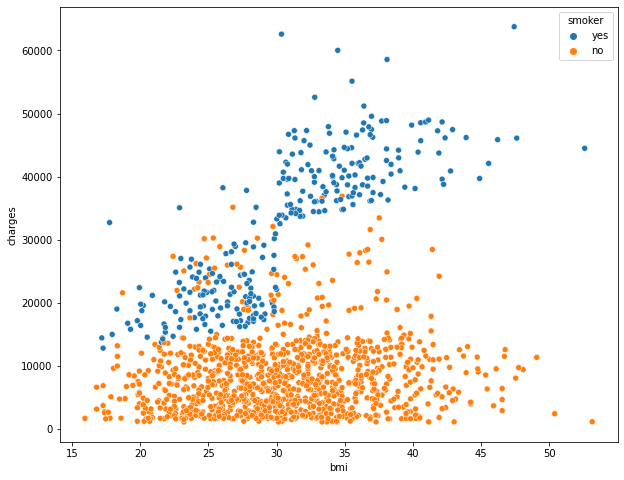

In [57]:
fig,ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x = df_insurance.bmi,y = df_insurance.charges,hue = df_insurance.smoker)
plt.show()